In [1]:
import pandas as pd

# Read in white wine data 
MCdata = pd.read_csv(r"C:\Users\soari\Dropbox\HW Project\Machine_learning_tensorflow\MCdata_generation/MCdata.csv",header=None)

# Read in red wine data 
MClabel = pd.read_csv(r"C:\Users\soari\Dropbox\HW Project\Machine_learning_tensorflow\MCdata_generation/MClabel.csv",header=None)

In [2]:
print(MCdata.info())
print(MClabel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 100 columns):
0     6000 non-null int64
1     6000 non-null float64
2     6000 non-null float64
3     6000 non-null float64
4     6000 non-null float64
5     6000 non-null float64
6     6000 non-null float64
7     6000 non-null float64
8     6000 non-null float64
9     6000 non-null float64
10    6000 non-null float64
11    6000 non-null float64
12    6000 non-null float64
13    6000 non-null float64
14    6000 non-null float64
15    6000 non-null float64
16    6000 non-null float64
17    6000 non-null float64
18    6000 non-null float64
19    6000 non-null float64
20    6000 non-null float64
21    6000 non-null float64
22    6000 non-null float64
23    6000 non-null float64
24    6000 non-null float64
25    6000 non-null float64
26    6000 non-null float64
27    6000 non-null float64
28    6000 non-null float64
29    6000 non-null float64
30    6000 non-null float64
31    6000 non-null float6

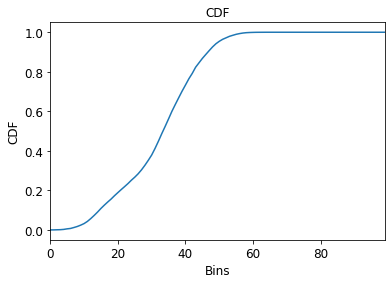

In [3]:
import matplotlib.pyplot as plt
pm = MCdata[100:101]
# pm.plot(kind='bar',legend=False)
ax = pm.transpose().plot(kind='line', title ="CDF", figsize=(6, 4), legend=False, fontsize=12) 
ax.set_xlabel("Bins", fontsize=12)
ax.set_ylabel("CDF", fontsize=12)
plt.show()
    # plt.savefig('filename.png', dpi=600)


In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(MCdata, MClabel, test_size=0.33, random_state=42)



In [5]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(100, activation='relu', input_shape=(100,)))

# Add one hidden layer 
model.add(Dense(20, activation='relu'))

# Add an output layer 
model.add(Dense(3, activation='sigmoid'))


# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 63        
Total params: 12,183
Trainable params: 12,183
Non-trainable params: 0
_________________________________________________________________


[array([[-0.01495411,  0.08645007,  0.14556068, ...,  0.07085387,
         -0.08209375,  0.11605823],
        [ 0.03706749, -0.10447321, -0.12717947, ..., -0.09519328,
         -0.02473672,  0.04451065],
        [-0.05049025, -0.10009768, -0.1568355 , ...,  0.09656784,
         -0.03930967,  0.03111023],
        ...,
        [-0.07718948,  0.02146439, -0.10765237, ...,  0.0202217 ,
         -0.14502834, -0.13280964],
        [ 0.09265247, -0.00644904, -0.01142393, ..., -0.01461776,
         -0.14273871,  0.11152431],
        [ 0.17044121,  0.09840471,  0.03406438, ..., -0.11798705,
         -0.11388305, -0.12105736]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [8]:
X_train=X_train.transpose()
X_test=X_test.transpose()
y_train=y_train.transpose()
y_test=y_test.transpose()


from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train,epochs=5,batch_size=1,verbose=1,validation_split=0.2)
y_pred = model.predict(X_test)

score = model.evaluate(X_test, y_test,verbose=1)
# print("Test Score:", score[0])
# print("Test Accuracy:", score[1])


Train on 3216 samples, validate on 804 samples
Epoch 1/5
3216/3216 [==============================] - 8s 3ms/step - loss: 0.1983 - acc: 0.9269 - val_loss: 0.0640 - val_acc: 0.9776
Epoch 2/5
3216/3216 [==============================] - 7s 2ms/step - loss: 0.0521 - acc: 0.9807 - val_loss: 0.0446 - val_acc: 0.9838
Epoch 3/5
3216/3216 [==============================] - 6s 2ms/step - loss: 0.0293 - acc: 0.9895 - val_loss: 0.0271 - val_acc: 0.9851
Epoch 4/5
3216/3216 [==============================] - 5s 2ms/step - loss: 0.0314 - acc: 0.9888 - val_loss: 0.0220 - val_acc: 0.9876
Epoch 5/5
1980/1980 [==============================] - 0s 17us/step


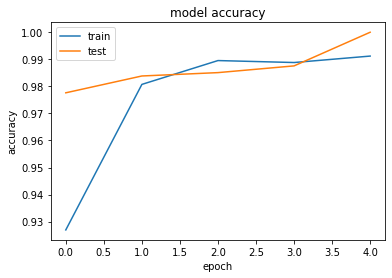

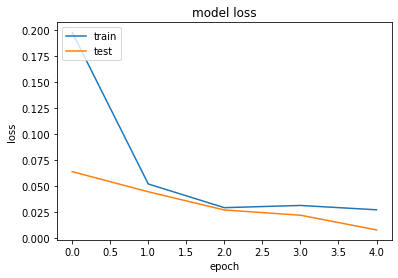

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()